# Observed Diel and Seasonal Cycles of Plankton in the North Atlantic

*Final Project for the July 2023 UW Data Science in Oceanography program*

#### Project Members: *Robin Chartrand, Ana Herrera, Desiree Jones*

### Abstract:

Vertical Migration is the upward or downward synchronized movement of plankton and other marine animals in a body of water. This common behavior can be diel or seasonal and occurs for a multitude of reasons such as avoiding predation, accessing sunlight and nutrients, and avoiding harmful UV radiation. While there are many theories and lab studies about this migration process, there are few in situ observational studies of this phenomenon. Plankton are known to behave differently in controlled lab conditions than in nature, so in order to better understand this phenomenon we sought to measure this process using observational data. Using plankton images taken and classified by the Imaging FlowCytoBot at the WHOI Martha’s Vineyard Coastal Observatory we tracked the vertical migration of 103 plankton species over various time scales. Through observation of the diel and seasonal vertical movement, it was noted that most plankton migrate to the surface at nighttime and migrate to deeper layers during the day. These observations demonstrate the idea that most plankton rise to the surface at night to feed when they are less likely to be seen by predators. We found that different groups of plankton (diatoms, flagellates, ciliates, and dinoflagellates) had differing seasonal cycles with some more active at the surface during the winter months and others more active during the summer. These periodic patterns are relevant in understanding the impact of plankton on the overall carbon cycle of the ocean

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
from collections import Counter
from matplotlib.animation import FuncAnimation
import os
import numpy as np

In [23]:
data_dir = "/content/drive/MyDrive/Datasets2023/WHOI-Plankton"

names = []
for filename in os.listdir(data_dir):
  if filename[-4:] == ".zip":
    with ZipFile(data_dir + "/" + filename, 'r') as f:
       #names.append(f.namelist())
       f.extractall()


[]


In [20]:
clean = []
for i in range(len(names)):
  curr_year = names[i]
  for i in curr_year:
    if i[-1] != "/":
      clean.append(i[i.find("/") +1:])
#print(clean[-100:])

['Tontonia_gracillima/IFCB5_2013_127_193749_03392.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_03441.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_03518.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_03830.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_03879.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_03990.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_04182.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_04189.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_04425.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_04488.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_04698.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_04729.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_04772.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_04784.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_04839.png', 'Tontonia_gracillima/IFCB5_2013_127_193749_04885.png', 'Tontonia_gracillima/IFCB5_2013_127_200102_00106.png', 'Tontonia_gracillima/IFCB5_2013_127_200102_00173.png', 'Tontonia

In [ ]:
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']

all_years = {}

for year in years:
  dir_name = "/content/" + year
  a=!find  "{dir_name}" -name "*.png"

  species = [x[14: x.find("/", 15)] for x in a]
  years = [x[9:13] for x in a]
  days = [x[-20:-17] for x in a]
  hours = [x[-16:-14] for x in a]
  minutes = [x[-14:-12] for x in a]
  seconds = [x[-12:-10] for x in a]

  data = {"Species":species, "Years":years, "Days":days, "Hours":hours, "Minutes":minutes, "Seconds":seconds}
  df = pd.DataFrame.from_dict(data)

  all_years[year] = df

In [19]:
group_dict = {'Coccolithophore':
                                ['Acanthoica_quattrospina', 'Calciopappus','Emiliania_huxleyi',
                                'Ophiaster', 'Rhabdosphaera', 'Syracosphaera_pulchra', 'coccolithophorid'],
              'Miscellaneous':['Grazing','Radiolarian','bad','bead','bubble','colony',
                               'cresent','detritus','detritus_clear', 'fecal pellet',
                               'fiber','mix','pollen','unknown2','zooplanktonelse'],
              'Ciliates':['Dictyocysta','Didinium_sp','Euplotes','Euplotes morphotype1','Euplotes_sp','Eutintinnus',
                          'Favella','Helicostomella_subulata','Laboea_strobila','Leegaardiella_ovalis','Mesodinium_sp',
                          'Pleuronema_sp','Stenosemella pacifica','Stenosemella_sp1','Strobilidium morphotype1',
                          'Strobilidium_morphotype1','Strombidium_capitatum','Strombidium_conicum','Strombidium_inclinatum',
                          'Strombidium_morphotype1','Strombidium_morphotype2','Strombidium_oculatum','Strombidium_wulffi',
                          'Suctoria','Tiarina_fusus','Tintinnid','Tintinnidium_mucicola','Tintinnopsis','Tontonia_appendiculariformis','Tontonia_gracillima'],
              'Diatoms':['Asterionellopsis glacialis','Bacillaria','Bidulphia','Cerataulina','Cerataulina pelagica','Cerataulina_flagellate',
                         'Chaetoceros','Chaetoceros_curvisetus','Chaetoceros_danicus','Chaetoceros_debilis','Chaetoceros_didymus','Chaetoceros_didymus_flagellate',
                         'Chaetoceros_flagellate','Chaetoceros_lorenzianus','Chaetoceros_pennate','Chaetoceros_socialis','Chaetoceros_subtilis','Corethron hystrix',
                         'Coscinodiscus','Cylindrotheca','DactFragCerataul','Dactyliosolen','Dactyliosolen blavyanus','Dactyliosolen fragilissimus',
                         'Delphineis','Ditylum','Ditylum brightwellii','Ditylum_parasite','Ephemera','Eucampia','G_delicatula_detritus','G_delicatula_external_parasite',
                         'G_delicatula_parasite','Guinardia_delicatula','Guinardia_flaccida','Guinardia_striata','Hemiaulus','Lauderia annulata','Leptocylindrus',
                         'Leptocylindrus_mediterraneus','Licmophora','Odontella','Odontella_mobiliensis','Paralia sulcata','Pleurosigma','Proboscia','Pseudonitzschia','Raphoneis','Rhizosolenia',
                         'Skeletonema','Stephanopyxis','Striatella unipunctata','Thalassionema','Thalassiosira','Thalassiosira sp aff mala','Thalassiosira_dirty','Thalassiosira_rotula',
                         'pennate','pennate_morphotype1'],
              'Dinoflagellates':['Akashiwo','Amphidinium_sp','Asterodinium','Ceratium','Ceratium_furca','Ceratium_fusus','Ceratium_lineatum'
                                ,'Cochlodinium','Dinophyceae morphotype 1','Dinophyceae morphotype 2','Dinophysis','Gonyaulax','Gymnodinium','Gyrodinium','Heterocapsa_rotundata'
                                ,'Heterocapsa_triquetra','Karenia','Katodinium_or_Torodinium','Margalefidinium','Oxyrrhis','Podolampas','Polykrikos','Prorocentrum'
                                ,'Proterythropsis_sp','Protoperidinium','Warnowia','unknown3_squiggle'],
              'Flagellates':['Apedinella','Chroomonas','Chrysochromulina','Chrysochromulina lanceolata','Dictyocha','Dinobryon','Euglena'
                            ,'Parvicorbicula_socialis','Phaeocystis','Pseudochattonella_farcimen','Pterosperma','Pyramimonas','Pyramimonas_longicauda'
                            ,'Vicicitus_globosus','amoeba','clusterflagellate','crypto','flagellate morphotype1','flagellate morphotype3','flagellate_sp3']
              }
new_dic = {}
for k,v in group_dict.items():
    for x in v:
        new_dic[x] = k

leap_years = ['2008', '2012']
months = {'January':np.arange(0, 31), 'February':np.arange(31, 59),
          'March':np.arange(59, 90), 'April':np.arange(90, 120),
          'May': np.arange(120, 151), 'June':np.arange(151, 181),
          'July':np.arange(181, 212), 'August':np.arange(212, 243),
          'September':np.arange(243, 273), 'October':np.arange(273, 304),
          'November':np.arange(304, 334), 'December':np.arange(334, 365)}
leap_months = {'January':np.arange(0, 31), 'February':np.arange(31, 60),
          'March':np.arange(60, 91), 'April':np.arange(91, 121),
          'May': np.arange(121, 152), 'June':np.arange(152, 182),
          'July':np.arange(182, 213), 'August':np.arange(213, 244),
          'September':np.arange(244, 274), 'October':np.arange(274, 305),
          'November':np.arange(305, 335), 'December':np.arange(335, 366)}

rev_months = {}
for k,v in months.items():
    for x in v:
        rev_months[x] = k

rev_leap_months = {}
for k,v in leap_months.items():
    for x in v:
        rev_leap_months[x] = k

In [ ]:

df['Month'] = df['Days'].map(rev_months)

print(df[df['Years'] == 2008])
for year in years:
    if year in leap_years:
        df[df['Years'] == year]['Month'] = df[df['Years'] == year]['Days'].map(rev_months)


df.to_csv('all_years.csv')

In [105]:

mega_df = pd.concat(list(all_years.values()))

data_fr = mega_df
data_fr['Group'] = data_fr['Species'].map(new_dic)
data_fr['Days'] = data_fr['Days'].astype('int')
data_fr['Month'] = data_fr['Days'].map(rev_months)

df = data_fr
df = df[df['Minutes'] != 'ch']
df = df[df['Group'] != 'Miscellaneous']
df = df[df['Group'].isnull() == False]
df['Hours'] = df['Hours'].astype('int')




Counter({'January': 2477, 'February': 1523, 'December': 474, 'March': 312, 'September': 143, 'November': 87, 'October': 59, 'April': 43, 'August': 24, 'May': 10, 'June': 6, 'July': 3})


In [2]:
df = pd.read_csv('better_years.csv')
df

,Species,Years,Days,Hours,Minutes,Seconds,Month,Group
0,Chaetoceros_didymus,2006,272,0,8,27,September,Diatoms
1,Chaetoceros_didymus,2006,191,18,32,59,July,Diatoms
2,Chaetoceros_didymus,2006,198,22,57,5,July,Diatoms
3,Chaetoceros_didymus,2006,171,0,35,22,June,Diatoms
4,Chaetoceros_didymus,2006,172,18,3,17,June,Diatoms
...,...,...,...,...,...,...,...,...
422592,pennate_morphotype1,2014,304,17,58,3,November,Diatoms
422593,pennate_morphotype1,2014,353,20,5,17,December,Diatoms
422594,pennate_morphotype1,2014,16,19,57,25,January,Diatoms
422595,pennate_morphotype1,2014,270,21,51,53,September,Diatoms


In [16]:
month_dict = {"January": 1, "February": 2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df['Month_Num'] = df['Month'].map(month_dict)

In [70]:
month_counts = df.groupby(['Group', 'Month_Num'])['Species'].count()
month_counts['Ciliates']

Month_Num
1      919
2      685
3      985
4     1429
5     1562
6      332
7      320
8      474
9     1016
10    1006
11     972
12     889
Name: Species, dtype: int64

Text(0, 0.5, 'Normalized Frequency')

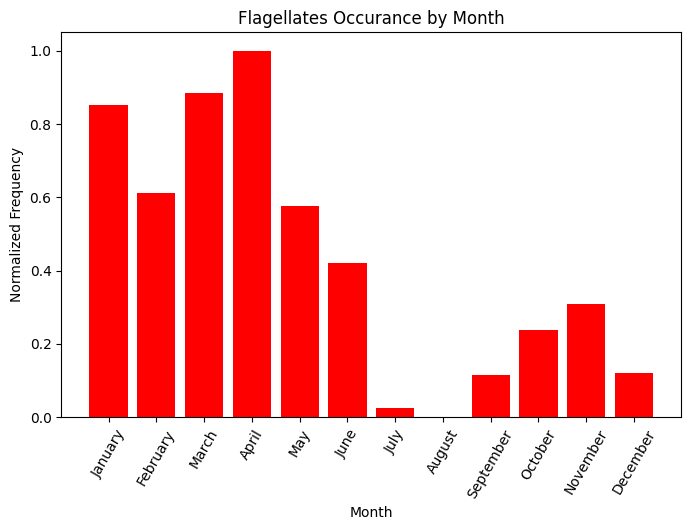

In [84]:
groups = ['Flagellates']

fig = plt.figure(figsize=(8,5))
for group in groups:

  dat = month_counts[group]
  dat = (dat - dat.min()) / (dat.max() - dat.min())
  plt.bar(dat.index, dat.values, color='Red')

#plt.legend(df.Group.unique(), bbox_to_anchor=(1,1))
plt.title('Flagellates Occurance by Month')
plt.xticks(ticks = dat.index, labels=month_dict.keys(), rotation = 60)
plt.xlabel('Month')
plt.ylabel('Normalized Frequency')

Text(0, 0.5, 'Count')

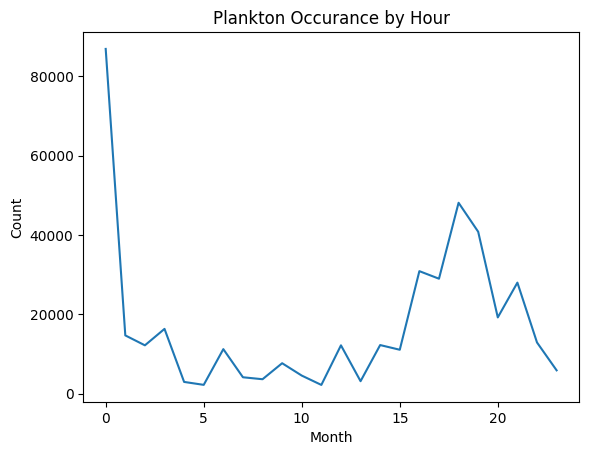

In [3]:
all_months = df.groupby(['Hours'])['Species'].count()
plt.plot(all_months)
#fig = plt.figure(figsize=(8,5))
plt.title('Plankton Occurance by Hour')
plt.xlabel('Month')
plt.ylabel('Count')


In [45]:
hour_counts = df.groupby(['Group', 'Hours'])['Species'].count()

Text(0, 0.5, 'Normalized Frequency')

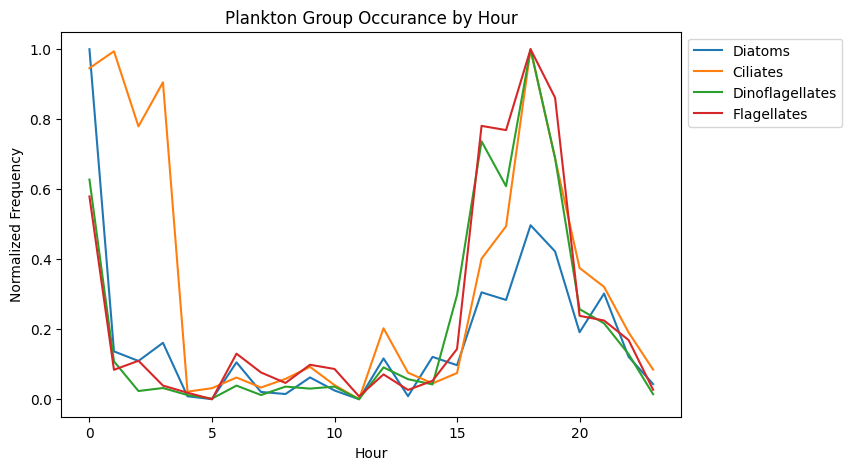

In [85]:
groups = ['Diatoms', 'Ciliates', 'Dinoflagellates', 'Flagellates']
fig = plt.figure(figsize=(8,5))
for group in groups:

    dat = hour_counts[group]
    dat = (dat - dat.min()) / (dat.max() - dat.min())
    plt.plot(dat)

plt.legend(df.Group.unique(), bbox_to_anchor=(1,1))
plt.title('Plankton Group Occurance by Hour')
plt.xlabel('Hour')
plt.ylabel('Normalized Frequency')


In [ ]:
hour_month_counts = df.groupby(['Group', 'Month_Num', 'Hours'])['Species'].count()

In [43]:
months = list(month_dict.keys())

def animation_func(month):
  fig.clear()
  for group in df.Group.unique():
    if month not in hour_month_counts[group]:
      dat = np.zeros(24)
    else:
      dat = hour_month_counts[group][month]
      dat = (dat - dat.min()) / (dat.max() - dat.min())
    plt.plot(dat)


  plt.legend(df.Group.unique(), bbox_to_anchor=(1,1))
  plt.title('Plankton Group Occurance by Hour in ' + months[month - 1])
  plt.xlabel('Hour')
  plt.ylabel('Normalized Frequency')

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


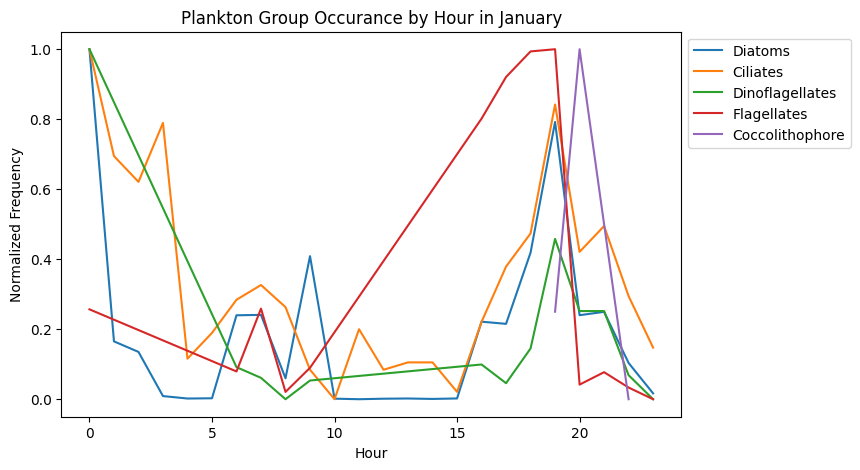

In [44]:
fig = plt.figure(figsize=(8,5))
animation = FuncAnimation(fig, animation_func, frames = np.arange(1,13))
animation.save('hour_by_month.mp4')

Text(0, 0.5, 'Normalized Frequency')

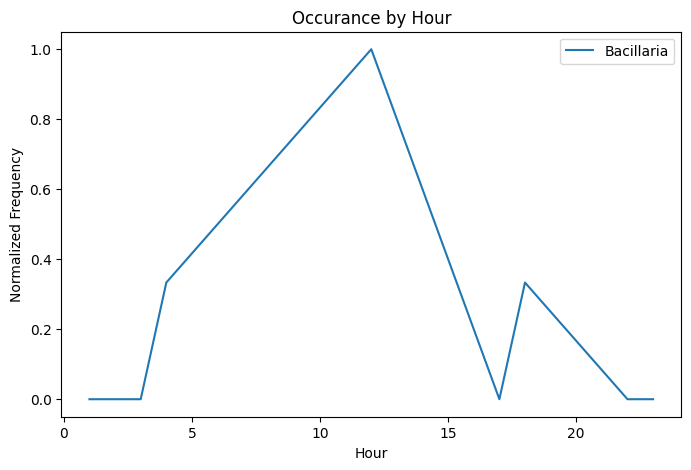

In [66]:
coco_df = df
hour_species_counts = coco_df.groupby(['Species', 'Hours'])['Minutes'].count()
fig = plt.figure(figsize=(8,5))
legend = []
for species in coco_df.Species.unique():
  dat = hour_species_counts[species]
  dat = (dat - dat.min()) / (dat.max() - dat.min())
  day = [x for x in range(len(dat.index)) if 15>= dat.index[x] >= 9]
  night = [x for x in range(len(dat.index)) if dat.index[x] >= 16 or dat.index[x] <= 8]
  legend.append(species)
  plt.plot(dat)

plt.legend(legend, bbox_to_anchor=(1,1))
plt.title('Occurance by Hour')
plt.xlabel('Hour')
plt.ylabel('Normalized Frequency')

In [28]:
total_count = df[df['Group'] != 'Coccolithophore'].groupby(['Group', 'Hours'])['Species'].count()
groups = {}
for i in df[df['Group'] != 'Coccolithophore']['Group'].unique():
  dat = total_count[i]
  dat = (dat - dat.min()) / (dat.max() - dat.min())
  groups[i] = dat


def animation_func(hour):
  fig.clear()
  val = []
  for i in list(groups.values()):
    val.append(i[hour])
  plt.title('Plankton Abundance by Group: Hour ' + str(hour))
  plt.ylabel('Normalized Count')
  plt.ylim([0, 1])
  plt.bar(groups.keys(), val)

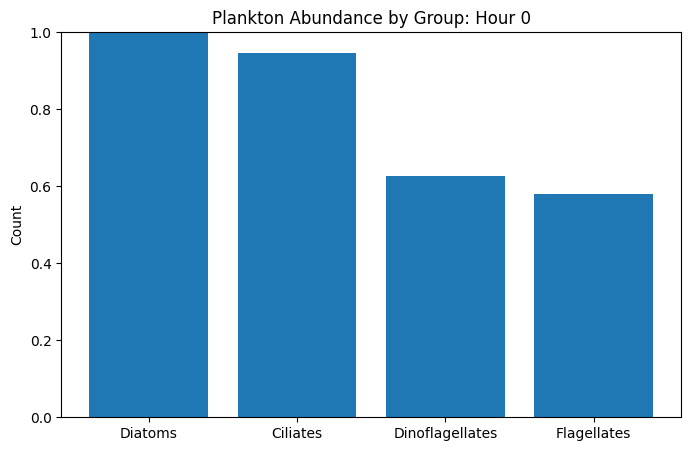

In [31]:
fig = plt.figure(figsize=(8,5))
animation = FuncAnimation(fig, animation_func, frames = np.arange(0,24))
animation.save('abundance_by_hour.mp4', fps=3)

<BarContainer object of 39 artists>

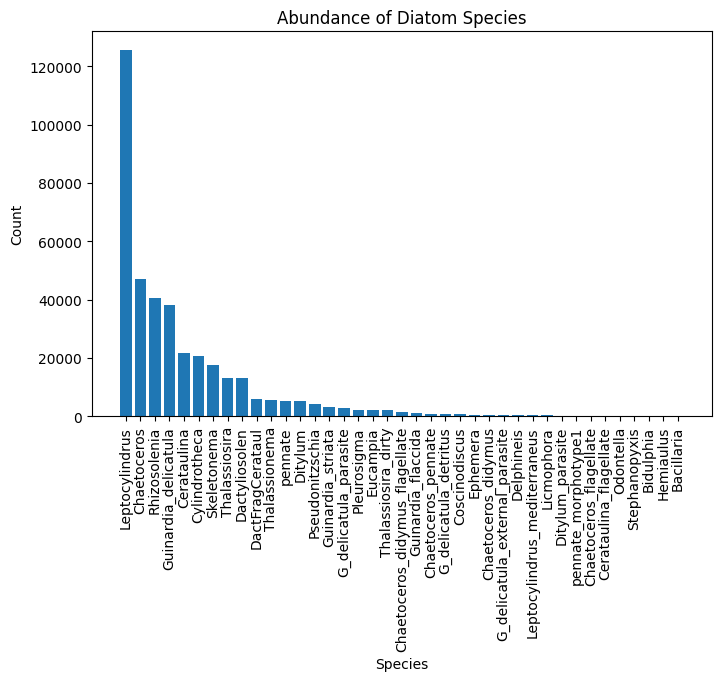

In [63]:
diatom_count = df[df['Group'] == "Diatoms"].groupby('Species')['Hours'].count().sort_values(ascending=False)
fig = plt.figure(figsize=(8,5))
plt.title('Abundance of Diatom Species')
plt.xlabel('Species')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.bar(diatom_count.index, diatom_count.values)

In [4]:
len(df['Species'])

422597